In [1]:
# Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [2]:
# import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [5]:
# Load the CSV to Googke Colab

# from google.colab import files
# uploaded = files.upload()

Saving Login.csv to Login.csv


In [15]:
# Get the data

log = pd.read_csv("Login.csv") 

In [16]:
# Store your own Twitter API Credentials in a "Login.csv" file for the steps below to work


# Twitter API Credentials

consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [17]:
# Create the authentication object

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret

authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [20]:
# Extract 100 tweets from the twitter user

posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print last 5 twees from the account

print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) +") " + tweet.full_text+"\n")
  i+=1

Show the 5 recent tweets: 

1) This is an important reminder from @rajpanjabi. The world should not have to choose between saving lives from COVID-19 and saving lives from malaria. It’s possible to do both. https://t.co/AIheJzLsK5

2) I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. https://t.co/x0xPNS5I8A

3) European Commissioner @SKyriakidesEU and I discussed the importance of multilateral partnerships like @CEPIvaccines in ending this pandemic and preventing another. https://t.co/NGk7eFpul7

4) To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation. https://t.co/VHFFOSykZk

5) The omicron surge is an unfortunate reminder that the only way to e

In [27]:
# Create a dataframe with a column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])

# Showing the first 5 rows of data

df.head()

,Tweets
0,This is an important reminder from @rajpanjabi...
1,I wholeheartedly agree with Larry's view that ...
2,European Commissioner @SKyriakidesEU and I dis...
3,To have any hope of reaching net zero and halt...
4,The omicron surge is an unfortunate reminder t...


In [28]:
# Clean the text

# Create a function to clean the tweets

def cleanText(text):
  text = re.sub(r"@[A-Za-z0-9]+", "", text) # Removes @mentions
  text = re.sub(r"#", "", text) # Removing the '#' symbol
  text = re.sub(r"RT[\s]+", "", text) # Removing RT
  text = re.sub(r"https?:\/\/\S+", "", text) # Removing the hyper links

  return text

# Cleaning the text

df["Tweets"] = df["Tweets"].apply(cleanText)

# Show the cleaned text

df

,Tweets
0,This is an important reminder from . The world...
1,I wholeheartedly agree with Larry's view that ...
2,European Commissioner and I discussed the imp...
3,To have any hope of reaching net zero and halt...
4,The omicron surge is an unfortunate reminder t...
...,...
95,Public-private collaborations will be critical...
96,I’m excited about Energy’s expanded work with...
97,_voorhies: Smallholder agriculture is a pathwa...
98,": Today, Energy and MissionInnovation announc..."


In [29]:
# Create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns -> "subjectivity" && "polarity"

df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

# Show the new DataFrame with the new Columns

df

,Tweets,Subjectivity,Polarity
0,This is an important reminder from . The world...,1.000000,0.200000
1,I wholeheartedly agree with Larry's view that ...,0.300000,-0.066667
2,European Commissioner and I discussed the imp...,0.100000,0.050000
3,To have any hope of reaching net zero and halt...,0.210417,0.000000
4,The omicron surge is an unfortunate reminder t...,1.000000,-0.250000
...,...,...,...
95,Public-private collaborations will be critical...,0.800000,0.000000
96,I’m excited about Energy’s expanded work with...,0.750000,0.375000
97,_voorhies: Smallholder agriculture is a pathwa...,0.422222,0.311111
98,": Today, Energy and MissionInnovation announc...",0.066667,0.000000


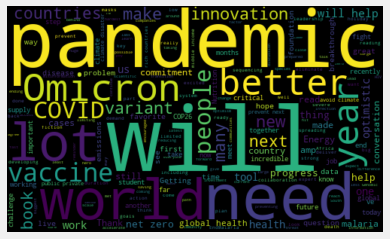

In [30]:
# Plot the Word Cloud

allWords= " ".join([tweets for tweets in df["Tweets"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score<0:
    return "Negative"
  elif score==0:
    return "Neutral"
  else:
    return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,This is an important reminder from . The world...,1.000000,0.200000,Positive
1,I wholeheartedly agree with Larry's view that ...,0.300000,-0.066667,Negative
2,European Commissioner and I discussed the imp...,0.100000,0.050000,Positive
3,To have any hope of reaching net zero and halt...,0.210417,0.000000,Neutral
4,The omicron surge is an unfortunate reminder t...,1.000000,-0.250000,Negative
...,...,...,...,...
95,Public-private collaborations will be critical...,0.800000,0.000000,Neutral
96,I’m excited about Energy’s expanded work with...,0.750000,0.375000,Positive
97,_voorhies: Smallholder agriculture is a pathwa...,0.422222,0.311111,Positive
98,": Today, Energy and MissionInnovation announc...",0.066667,0.000000,Neutral


In [36]:
# Print all of the positive tweets

j=1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0, sortedDF.shape[0]):
  if sortedDF["Analysis"][i] == "Positive":
    print(str(j)+") "+sortedDF["Tweets"][i])
    print()
    j+=1

1) This is an important reminder from . The world should not have to choose between saving lives from COVID-19 and saving lives from malaria. It’s possible to do both. 

2) European Commissioner  and I discussed the importance of multilateral partnerships like  in ending this pandemic and preventing another. 

3) The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. 

4) Thanks  for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. 

5) :       We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…

6)      .  has started the conversation about how we avoid the next pandemic which is important. I appreciate your work on this. We can do a lot better next time!!

7)     A more transmissive variant is 

In [37]:
# Print the negative tweets

j=1
sortedDF2 = df.sort_values(by=["Polarity"], ascending=False)
for i in range(0, sortedDF2.shape[0]):
  if sortedDF2["Analysis"][i] == "Negative":
    print(str(j)+") "+sortedDF2["Tweets"][i])
    print()
    j+=1

1) I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. 

2) The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why  is joining  to renew our investment in . 

3) ICYMI here’s a recap of my conversation with . We chatted about this pandemic, how to prevent the next one, and a few things in between. 

4) :     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

5)     People like you and I and Tony Fauci have been subject to a lot of misinformation. I didn't expect that. Some of it like me putting chips in arms doesn't make sense to me - why would I want to do that?

6) :   One major problem has been online misinformation on Facebook &amp; other platforms around vaccines, masks and…

7)   Do you think the wor

In [38]:
# Print the neutral tweets

j=1
sortedDF3 = df.sort_values(by=["Polarity"])
for i in range(0, sortedDF3.shape[0]):
  if sortedDF3["Analysis"][i] == "Neutral":
    print(str(j)+") "+sortedDF3["Tweets"][i])
    print()
    j+=1

1) To have any hope of reaching net zero and halting the progress of climate change, we need deep and comprehensive collaboration between the public and private sectors worldwide. I was encouraged by today’s discussions about how to accelerate innovation. 

2) Genomic sequencing is a critical tool that will help us fight COVID-19 and prevent the next pandemic. 

3) :     I'd make a joke but would cause a storm😆. Turning to the Gates Foundation's mission, what do…

4) :   Looking back on 2020/21 (and given you warned of a respiratory pandemic for years before), what do you th…

5) :  There's been a lot of discussion on responsibility of pharma companies like Pfizer/Moderna for access. What is…

6) :  Agree 100%- next gen vaccines with sterilising immunity. 2nd question: What are the current challenges in reach…

7) : To kick-off the conversation with , what scientific or tech breakthrough would make the biggest difference now t…

8) Omicron is spreading faster than any virus in history.

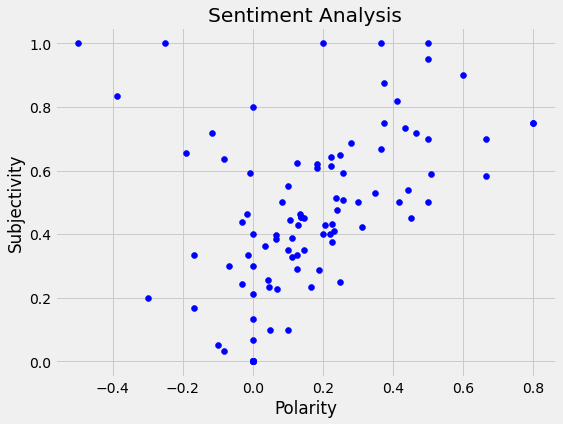

In [39]:
# Plot the Polarity and Subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [43]:
# Get the percentage of positive tweets

ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets["Tweets"]

positive_percentage = round((ptweets.shape[0] / df.shape[0])*100, 1)
print(f"Positive Tweets: {positive_percentage} %")

# Get the percentage of neutral tweets

ptweets = df[df.Analysis == "Neutral"]
ptweets = ptweets["Tweets"]

neutral_percentage = round((ptweets.shape[0] / df.shape[0])*100, 1)
print(f"Neutral Tweets: {neutral_percentage} %")

# Get the percentage of negative tweets

ptweets = df[df.Analysis == "Negative"]
ptweets = ptweets["Tweets"]

negative_percentage = round((ptweets.shape[0] / df.shape[0])*100, 1)
print(f"Negative Tweets: {negative_percentage} %")

Positive Tweets: 67.0 %
Neutral Tweets: 16.0 %
Negative Tweets: 17.0 %


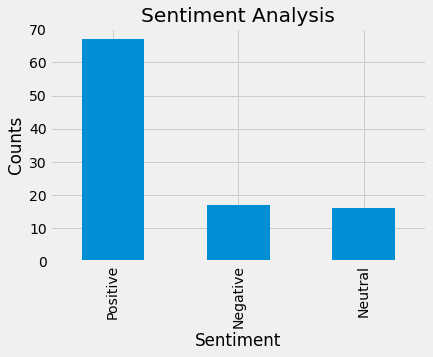

In [47]:
# Show the value counts

df["Analysis"].value_counts()

# plot and visualize the counts in Bar Graph

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()

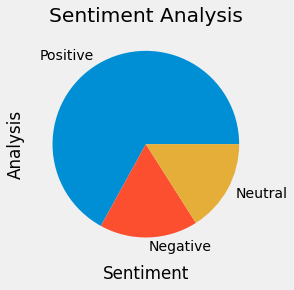

In [50]:
# Show the value counts

df["Analysis"].value_counts()

# plot and visualize the counts in Pie Chart

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
df["Analysis"].value_counts().plot(kind="pie")
plt.show()